In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

In [2]:
clu1 = pd.read_csv('../Catalogues/NGC2539_8_Pop1.csv')
clu1

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,122.480864,-13.408580,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,...,0.988,13.472965,13.666136,13.149684,0.516452,NaN,-32.626777,122.480874,-13.408578,0.779411
1,122.414196,-13.314850,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,...,0.930,13.363639,13.594479,12.984633,0.609845,38.47,-32.552534,122.414207,-13.314847,0.814383
2,122.250761,-13.170479,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,...,1.056,14.926690,15.240170,14.442820,0.797351,NaN,-32.452962,122.250772,-13.170477,0.781669
3,122.103406,-13.064577,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,...,0.998,13.934523,14.170032,13.552169,0.617864,24.37,-32.386462,122.103416,-13.064574,0.802698
4,122.775145,-13.479979,5726679491477381504,0.0099,0.0081,0.6943,0.0144,2.384,-2.350,0.014,...,1.056,13.190701,13.337885,12.910949,0.426936,NaN,-32.622936,122.775155,-13.479977,0.736667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,122.774600,-12.305781,5727617271816364032,0.0158,0.0142,0.7523,0.0232,2.489,-2.374,0.024,...,0.987,14.581053,14.875655,14.124689,0.750966,33.53,-31.487406,122.774611,-12.305778,0.794660
464,122.749541,-12.298492,5727617550992630528,0.0408,0.0394,0.7921,0.0634,2.349,-2.276,0.065,...,0.980,16.656437,17.172783,15.991074,1.181709,NaN,-31.486533,122.749552,-12.298490,0.823610
465,122.746981,-12.238204,5727664933071818624,0.0326,0.0303,0.7213,0.0490,2.408,-2.327,0.047,...,0.957,16.202570,16.640747,15.597906,1.042841,NaN,-31.428826,122.746991,-12.238201,0.754288
466,122.678529,-12.205109,5727665959566833280,0.0263,0.0248,0.7160,0.0404,2.447,-2.376,0.039,...,1.063,15.679736,16.076110,15.110518,0.965592,NaN,-31.413650,122.678540,-12.205106,0.758490


In [3]:
clu2 = pd.read_csv('../Catalogues/NGC2539_9_Pop2.csv')
clu2

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,120.750245,-12.176855,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,...,1.031,18.310925,19.155960,17.442314,1.713646,NaN,-31.849131,120.750260,-12.176860,0.893827
1,120.748502,-12.169048,3036168014259997824,0.3567,0.2588,0.8023,0.6067,2.525,-2.522,0.528,...,1.033,20.078209,20.758951,19.249168,1.509783,NaN,-31.841959,120.748514,-12.169048,0.798188
2,120.774801,-12.163916,3036173851116718848,0.2784,0.2068,0.7845,0.4647,2.086,-1.933,0.416,...,1.023,19.835163,20.270933,19.323252,0.947681,NaN,-31.830819,120.774810,-12.163912,0.797336
3,120.830799,-12.110140,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,...,1.015,20.334070,21.634747,19.380322,2.254425,NaN,-31.765490,120.830818,-12.110146,0.819051
4,120.801657,-12.016646,3036177527608927616,0.1308,0.1002,0.8452,0.2183,1.880,-1.865,0.206,...,1.009,18.960209,19.550852,18.278694,1.272158,NaN,-31.681546,120.801666,-12.016645,0.866427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,122.914872,-10.919792,5728376965631975424,0.0489,0.0423,0.8264,0.0680,4.139,-4.122,0.065,...,1.133,16.842428,17.422098,16.123170,1.298927,NaN,-30.111338,122.914890,-10.919791,0.857264
3083,122.927570,-10.901349,5728376999991722624,0.1685,0.1390,0.8548,0.2553,2.568,-2.559,0.239,...,1.032,18.987910,19.422186,18.417440,1.004746,NaN,-30.090364,122.927582,-10.901350,0.875762
3084,122.950038,-10.875279,5728377137430686464,0.5356,0.4344,0.7849,0.8926,1.754,-1.750,0.865,...,1.005,20.386703,20.888035,19.657074,1.230961,NaN,-30.059608,122.950046,-10.875278,0.809587
3085,122.532428,-10.872480,5728386143977005440,0.6301,0.5862,0.8346,0.9974,1.789,-1.451,1.059,...,1.034,20.602892,20.914776,20.015713,0.899063,NaN,-30.158888,122.532434,-10.872476,0.829929


In [4]:
df_cg =  pd.read_csv('../Catalogues/NGC2539_CG2020.csv')
df_cg

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA_icrs,_DE_icrs
0,122.394954,-13.387892,5725195979709240576,0.8421,-2.745,-0.158,NaN,11.2850,0.2596,0.1,NGC_2539,122.394966,-13.387891
1,122.480864,-13.408580,5725195086362592896,0.7015,-2.370,-0.552,NaN,13.4875,0.5209,1.0,NGC_2539,122.480875,-13.408578
2,122.414196,-13.314850,5725199621848057984,0.7928,-2.285,-0.596,NaN,13.3765,0.6157,1.0,NGC_2539,122.414206,-13.314847
3,122.529392,-13.572481,5725176733963219328,0.8125,-2.909,-0.693,NaN,17.0075,1.6094,0.2,NGC_2539,122.529405,-13.572478
4,122.304144,-13.335834,5725200034164950400,0.6482,-1.864,-0.112,NaN,17.1502,1.2305,0.2,NGC_2539,122.304153,-13.335833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,122.959075,-12.916797,5726735502146624768,0.9402,-2.502,-0.036,NaN,17.6577,1.5125,0.3,NGC_2539,122.959086,-12.916796
656,122.863137,-12.819585,5726740209432963328,0.7537,-2.447,-0.736,NaN,15.8269,0.9494,1.0,NGC_2539,122.863148,-12.819582
657,122.884588,-12.857850,5726739041201859712,0.7498,-2.457,-0.609,NaN,15.2710,0.8501,1.0,NGC_2539,122.884599,-12.857848
658,122.829808,-12.917917,5726737013974265856,0.7576,-2.472,-0.776,NaN,16.7705,1.1734,0.7,NGC_2539,122.829819,-12.917914


In [5]:
df_vg =  pd.read_csv('../Catalogues/NGC2539_vG2023.csv')
df_vg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
0,5727475713997164544,122.085796,-12.939379,0.9430,-2.372,-0.566,17.386324,18.035172,16.613567,NGC_2539,0.84
1,5727515811804670592,122.638484,-12.566409,1.2234,-2.221,-0.051,19.603275,20.804945,18.510267,NGC_2539,0.09
2,5727507462388545664,122.523434,-12.672588,0.8526,-2.399,-0.955,19.217720,20.322325,18.229084,NGC_2539,0.21
3,5727507496752995840,122.536228,-12.662708,0.8160,-2.199,-0.547,16.872574,17.405119,16.186954,NGC_2539,1.00
4,5727507561172761856,122.509307,-12.670922,0.5242,-2.144,-0.415,18.661766,19.653498,17.700052,NGC_2539,0.34
...,...,...,...,...,...,...,...,...,...,...,...
1134,5727686029950761984,122.436633,-12.071114,0.8368,-2.601,-0.613,14.364020,14.657393,13.891092,NGC_2539,0.74
1135,5727682387818471424,122.556861,-12.103188,0.8857,-2.488,-0.567,17.228657,17.876680,16.451502,NGC_2539,0.85
1136,5726626199526265600,122.875036,-13.668124,0.7324,-2.075,-0.386,17.558283,18.167610,16.768515,NGC_2539,0.74
1137,5727679742118907008,122.865618,-11.972691,0.6424,-2.494,-0.172,16.122349,16.502184,15.576842,NGC_2539,0.05


### Taking only the members of CG+2020 and vG+2023 that has Pmemb>0.7

In [6]:
kk, = np.where(df_cg.Proba >= 0.7)

In [7]:
dfcg = df_cg.iloc[kk]

In [8]:
jj, = np.where(df_vg.Pmemb >= 0.7)

In [9]:
dfvg = df_vg.iloc[jj]

In [10]:
dfcg

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA_icrs,_DE_icrs
1,122.480864,-13.408580,5725195086362592896,0.7015,-2.370,-0.552,NaN,13.4875,0.5209,1.0,NGC_2539,122.480875,-13.408578
2,122.414196,-13.314850,5725199621848057984,0.7928,-2.285,-0.596,NaN,13.3765,0.6157,1.0,NGC_2539,122.414206,-13.314847
11,123.318096,-12.582493,5726841398861736960,0.7350,-2.404,-0.464,NaN,12.3343,0.4054,1.0,NGC_2539,123.318107,-12.582491
14,123.145286,-12.662644,5726841948617622272,0.7533,-2.307,-0.476,NaN,15.7851,0.9579,1.0,NGC_2539,123.145296,-12.662642
15,123.256712,-12.461904,5726851874286978304,0.7461,-2.330,-0.594,NaN,13.4191,0.4908,1.0,NGC_2539,123.256723,-12.461901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,123.073887,-12.825628,5726742167937978880,0.7293,-2.424,-0.466,NaN,13.9947,0.6181,1.0,NGC_2539,123.073898,-12.825626
656,122.863137,-12.819585,5726740209432963328,0.7537,-2.447,-0.736,NaN,15.8269,0.9494,1.0,NGC_2539,122.863148,-12.819582
657,122.884588,-12.857850,5726739041201859712,0.7498,-2.457,-0.609,NaN,15.2710,0.8501,1.0,NGC_2539,122.884599,-12.857848
658,122.829808,-12.917917,5726737013974265856,0.7576,-2.472,-0.776,NaN,16.7705,1.1734,0.7,NGC_2539,122.829819,-12.917914


In [11]:
dfvg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
0,5727475713997164544,122.085796,-12.939379,0.9430,-2.372,-0.566,17.386324,18.035172,16.613567,NGC_2539,0.84
3,5727507496752995840,122.536228,-12.662708,0.8160,-2.199,-0.547,16.872574,17.405119,16.186954,NGC_2539,1.00
5,5727507634191970944,122.500003,-12.664322,0.7972,-2.162,-0.627,16.262781,16.715390,15.630763,NGC_2539,1.00
8,5727508012149665920,122.618510,-12.677455,0.7509,-2.210,-0.656,13.517174,13.713009,13.184590,NGC_2539,1.00
9,5727508080869467136,122.588714,-12.679646,0.7523,-2.359,-0.490,14.676732,14.967432,14.226639,NGC_2539,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1125,5726619018337860608,123.252087,-13.586994,0.6999,-2.338,-0.238,12.331991,12.442050,12.137307,NGC_2539,0.94
1134,5727686029950761984,122.436633,-12.071114,0.8368,-2.601,-0.613,14.364020,14.657393,13.891092,NGC_2539,0.74
1135,5727682387818471424,122.556861,-12.103188,0.8857,-2.488,-0.567,17.228657,17.876680,16.451502,NGC_2539,0.85
1136,5726626199526265600,122.875036,-13.668124,0.7324,-2.075,-0.386,17.558283,18.167610,16.768515,NGC_2539,0.74


### The cluster we believe is NGC2539 in our sample is Clu1, so we make a crossmatch of it with this literature data

Match with Cantat-Gaudin+2020.

In [119]:
ra1 = clu1.RA_ICRS
dec1 = clu1.DE_ICRS

ra2 = dfcg.RA_ICRS
dec2 = dfcg.DE_ICRS

In [120]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from Cantat-Gaudin+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [121]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [122]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [123]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [124]:
clu1.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,122.480864,-13.408580,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,...,0.988,13.472965,13.666136,13.149684,0.516452,NaN,-32.626777,122.480874,-13.408578,0.779411
1,122.414196,-13.314850,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,...,0.930,13.363639,13.594479,12.984633,0.609845,38.47,-32.552534,122.414207,-13.314847,0.814383
2,122.250761,-13.170479,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,...,1.056,14.926690,15.240170,14.442820,0.797351,NaN,-32.452962,122.250772,-13.170477,0.781669
3,122.103406,-13.064577,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,...,0.998,13.934523,14.170032,13.552169,0.617864,24.37,-32.386462,122.103416,-13.064574,0.802698
5,122.736248,-13.477531,5726679633214860928,0.0129,0.0106,0.7834,0.0185,2.562,-2.527,0.019,...,1.116,14.186480,14.451936,13.763537,0.688398,25.56,-32.630235,122.736259,-13.477529,0.825525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,122.774600,-12.305781,5727617271816364032,0.0158,0.0142,0.7523,0.0232,2.489,-2.374,0.024,...,0.987,14.581053,14.875655,14.124689,0.750966,33.53,-31.487406,122.774611,-12.305778,0.794660
464,122.749541,-12.298492,5727617550992630528,0.0408,0.0394,0.7921,0.0634,2.349,-2.276,0.065,...,0.980,16.656437,17.172783,15.991074,1.181709,NaN,-31.486533,122.749552,-12.298490,0.823610
465,122.746981,-12.238204,5727664933071818624,0.0326,0.0303,0.7213,0.0490,2.408,-2.327,0.047,...,0.957,16.202570,16.640747,15.597906,1.042841,NaN,-31.428826,122.746991,-12.238201,0.754288
466,122.678529,-12.205109,5727665959566833280,0.0263,0.0248,0.7160,0.0404,2.447,-2.376,0.039,...,1.063,15.679736,16.076110,15.110518,0.965592,NaN,-31.413650,122.678540,-12.205106,0.758490


In [47]:
dfcg.iloc[matched_idx_catalog2]

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA_icrs,_DE_icrs
1,122.480864,-13.408580,5725195086362592896,0.7015,-2.370,-0.552,NaN,13.4875,0.5209,1.0,NGC_2539,122.480875,-13.408578
2,122.414196,-13.314850,5725199621848057984,0.7928,-2.285,-0.596,NaN,13.3765,0.6157,1.0,NGC_2539,122.414206,-13.314847
475,122.250762,-13.170479,5725956017127403648,0.7379,-2.401,-0.453,NaN,14.9389,0.8090,1.0,NGC_2539,122.250772,-13.170477
476,122.103406,-13.064577,5725970276418851328,0.7504,-2.460,-0.546,NaN,13.9475,0.6245,1.0,NGC_2539,122.103417,-13.064574
485,122.736248,-13.477531,5726679633214860928,0.8088,-2.515,-0.419,NaN,14.1992,0.6948,1.0,NGC_2539,122.736259,-13.477529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,122.774600,-12.305781,5727617271816364032,0.7908,-2.428,-0.780,NaN,14.5927,0.7585,0.9,NGC_2539,122.774611,-12.305778
424,122.749542,-12.298492,5727617550992630528,0.7105,-2.408,-0.652,NaN,16.6721,1.1940,1.0,NGC_2539,122.749552,-12.298489
470,122.746981,-12.238204,5727664933071818624,0.7545,-2.412,-0.628,NaN,16.2199,1.0537,1.0,NGC_2539,122.746991,-12.238201
469,122.678530,-12.205108,5727665959566833280,0.7318,-2.408,-0.537,NaN,15.6910,0.9765,0.9,NGC_2539,122.678540,-12.205106


(121.2, 124.5)

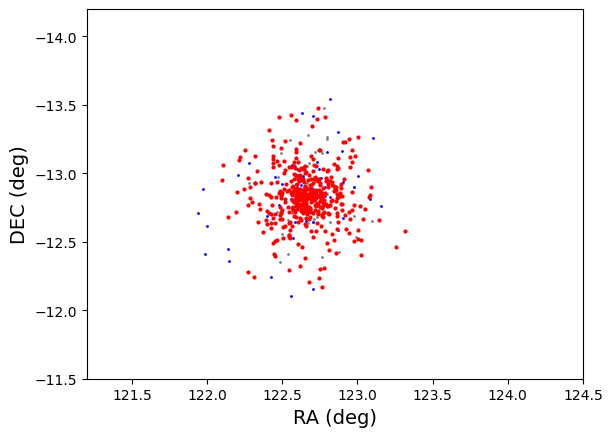

In [100]:
fig, ax = plt.subplots()

ax.scatter(clu1.RA_ICRS, clu1.DE_ICRS, s=1, c='grey')
ax.scatter(dfcg.RA_ICRS, dfcg.DE_ICRS, s=1, c='b')
ax.scatter(clu1.iloc[matched_idx_catalog1].RA_ICRS, clu1.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

Informations:

- Membership by GMM: 468
- Membership by Cantat-Gaudin(Pmemb>0.7): 485
- Membership crossmatch: 421

In [125]:
population1 = clu1.iloc[matched_idx_catalog1]

Match with vanGroeningen+2020.

In [126]:
ra1 = clu1.RA_ICRS
dec1 = clu1.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [127]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vanGroeningen+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [128]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [129]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [130]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [53]:
clu1.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,122.480864,-13.408580,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,...,0.988,13.472965,13.666136,13.149684,0.516452,NaN,-32.626777,122.480874,-13.408578,0.779411
1,122.414196,-13.314850,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,...,0.930,13.363639,13.594479,12.984633,0.609845,38.47,-32.552534,122.414207,-13.314847,0.814383
2,122.250761,-13.170479,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,...,1.056,14.926690,15.240170,14.442820,0.797351,NaN,-32.452962,122.250772,-13.170477,0.781669
3,122.103406,-13.064577,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,...,0.998,13.934523,14.170032,13.552169,0.617864,24.37,-32.386462,122.103416,-13.064574,0.802698
4,122.775145,-13.479979,5726679491477381504,0.0099,0.0081,0.6943,0.0144,2.384,-2.350,0.014,...,1.056,13.190701,13.337885,12.910949,0.426936,NaN,-32.622936,122.775155,-13.479977,0.736667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,122.774600,-12.305781,5727617271816364032,0.0158,0.0142,0.7523,0.0232,2.489,-2.374,0.024,...,0.987,14.581053,14.875655,14.124689,0.750966,33.53,-31.487406,122.774611,-12.305778,0.794660
464,122.749541,-12.298492,5727617550992630528,0.0408,0.0394,0.7921,0.0634,2.349,-2.276,0.065,...,0.980,16.656437,17.172783,15.991074,1.181709,NaN,-31.486533,122.749552,-12.298490,0.823610
465,122.746981,-12.238204,5727664933071818624,0.0326,0.0303,0.7213,0.0490,2.408,-2.327,0.047,...,0.957,16.202570,16.640747,15.597906,1.042841,NaN,-31.428826,122.746991,-12.238201,0.754288
466,122.678529,-12.205109,5727665959566833280,0.0263,0.0248,0.7160,0.0404,2.447,-2.376,0.039,...,1.063,15.679736,16.076110,15.110518,0.965592,NaN,-31.413650,122.678540,-12.205106,0.758490


In [55]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1021,5725195086362592896,122.480864,-13.408580,0.7372,-2.286,-0.556,13.472965,13.666136,13.149684,NGC_2539,1.0
1037,5725199621848057984,122.414196,-13.314850,0.7725,-2.311,-0.600,13.363639,13.594479,12.984633,NGC_2539,1.0
984,5725956017127403648,122.250761,-13.170479,0.7394,-2.347,-0.421,14.926690,15.240170,14.442820,NGC_2539,1.0
995,5725970276418851328,122.103406,-13.064577,0.7605,-2.301,-0.531,13.934523,14.170032,13.552169,NGC_2539,1.0
1102,5726679491477381504,122.775145,-13.479979,0.6943,-2.350,-0.400,13.190701,13.337885,12.910949,NGC_2539,1.0
...,...,...,...,...,...,...,...,...,...,...,...
435,5727617271816364032,122.774600,-12.305781,0.7523,-2.374,-0.748,14.581053,14.875655,14.124689,NGC_2539,1.0
436,5727617550992630528,122.749541,-12.298492,0.7921,-2.276,-0.582,16.656437,17.172783,15.991074,NGC_2539,1.0
1112,5727664933071818624,122.746981,-12.238204,0.7213,-2.327,-0.620,16.202570,16.640747,15.597906,NGC_2539,1.0
1109,5727665959566833280,122.678529,-12.205109,0.7160,-2.376,-0.585,15.679736,16.076110,15.110518,NGC_2539,1.0


(121.2, 124.5)

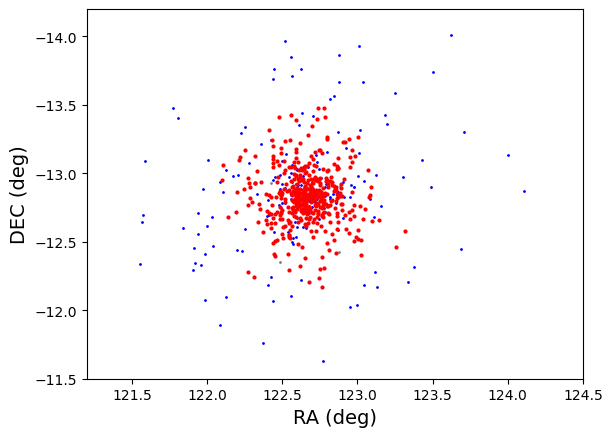

In [106]:
fig, ax = plt.subplots()

ax.scatter(clu1.RA_ICRS, clu1.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(clu1.iloc[matched_idx_catalog1].RA_ICRS, clu1.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

Informations:

- Membership by GMM: 468
- Membership by van Groeningen(Pmemb>0.7): 655
- Membership crossmatch: 462

In [131]:
population2 = clu1.iloc[matched_idx_catalog1]

### The second population we have chosen is thought to have members from NGC2539 that the GMM couldn't identify as belonging to the cluster. In here we test this hipotesis

Match with Cantat-Gaudin+2020.

In [12]:
ra1 = clu2.RA_ICRS
dec1 = clu2.DE_ICRS

ra2 = dfcg.RA_ICRS
dec2 = dfcg.DE_ICRS

In [13]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from Cantat-Gaudin+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [14]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [15]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [16]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [62]:
clu2.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
1557,122.818778,-13.543958,5726631357782433536,0.0259,0.0218,0.7728,0.0374,2.051,-1.990,0.038,...,1.123,15.771508,16.144722,15.226041,0.918681,NaN,-32.673928,122.818787,-13.543956,0.815280
1612,123.105806,-13.257325,5726666817032232448,0.0145,0.0135,0.6712,0.0204,2.336,-2.333,0.021,...,0.977,11.459053,12.024569,10.752057,1.272512,24.43,-32.325244,123.105817,-13.257325,0.695821
1629,122.704717,-13.420703,5726680870165439360,0.0543,0.0435,0.6883,0.0800,2.288,-2.235,0.083,...,0.995,17.297874,17.915932,16.553757,1.362175,NaN,-32.583117,122.704728,-13.420700,0.717649
1631,122.630282,-13.438659,5726683412786118016,0.0138,0.0101,0.7960,0.0203,2.582,-2.473,0.022,...,1.026,14.372489,14.678225,13.904002,0.774223,48.77,-32.618932,122.630293,-13.438656,0.837960
1641,122.871243,-13.299652,5726689322660960000,0.0800,0.0754,0.8412,0.0981,2.319,-2.222,0.105,...,0.975,17.678974,18.375671,16.890953,1.484718,NaN,-32.424699,122.871253,-13.299649,0.869006
1696,123.005494,-12.979303,5726722548527431296,0.0126,0.0114,0.7587,0.0169,2.738,-2.719,0.019,...,1.185,13.510445,13.754144,13.117920,0.636224,36.80,-32.081567,123.005507,-12.979301,0.800698
1721,122.742820,-12.956337,5726737147120148992,0.0706,0.0536,0.7190,0.0911,2.339,-2.338,0.113,...,0.980,17.357723,18.075691,16.523808,1.551884,NaN,-32.124605,122.742831,-12.956337,0.748141
1729,123.083184,-12.811886,5726743714126200576,0.0159,0.0138,0.7698,0.0251,2.227,-2.050,0.025,...,0.962,14.426980,14.696369,14.000173,0.696197,30.85,-31.900350,123.083194,-12.811882,0.812157
2036,122.601523,-12.990396,5727463928605442688,0.0243,0.0190,0.8263,0.0351,2.501,-2.501,0.034,...,1.013,15.529183,15.873437,15.017203,0.856234,NaN,-32.192474,122.601534,-12.990396,0.868827
2042,122.595687,-12.898294,5727465784031289344,0.0113,0.0083,0.7729,0.0152,2.246,-2.244,0.017,...,0.972,12.827418,13.011787,12.516235,0.495552,34.37,-32.104811,122.595697,-12.898294,0.804329


In [63]:
dfcg.iloc[matched_idx_catalog2]

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA_icrs,_DE_icrs
488,122.818779,-13.543958,5726631357782433536,0.7725,-1.851,-0.540,NaN,15.7826,0.9304,0.7,NGC_2539,122.818787,-13.543956
494,123.105806,-13.257325,5726666817032232448,0.7117,-2.300,-0.338,24.607907,11.4615,1.2932,0.7,NGC_2539,123.105817,-13.257324
489,122.704718,-13.420703,5726680870165439360,0.6896,-2.332,-0.513,NaN,17.3169,1.3816,0.9,NGC_2539,122.704728,-13.420700
499,122.630282,-13.438659,5726683412786118016,0.7999,-2.452,-0.761,NaN,14.3851,0.7843,0.9,NGC_2539,122.630293,-13.438655
542,122.871243,-13.299652,5726689322660960000,0.9113,-2.415,-0.543,NaN,17.7030,1.5212,0.7,NGC_2539,122.871254,-13.299650
517,123.005495,-12.979303,5726722548527431296,0.8411,-2.507,-0.587,NaN,13.5232,0.6429,1.0,NGC_2539,123.005506,-12.979300
633,122.742820,-12.956337,5726737147120148992,0.7984,-2.476,-0.313,NaN,17.3814,1.4912,0.7,NGC_2539,122.742831,-12.956336
620,123.083185,-12.811886,5726743714126200576,0.7564,-1.978,-0.842,NaN,14.4398,0.7051,0.9,NGC_2539,123.083194,-12.811882
172,122.601523,-12.990396,5727463928605442688,0.8520,-2.520,-0.085,NaN,15.5444,0.8628,0.7,NGC_2539,122.601535,-12.990396
389,122.595687,-12.898294,5727465784031289344,0.8108,-2.125,-0.210,NaN,12.8400,0.5027,0.7,NGC_2539,122.595697,-12.898293


(121.2, 124.5)

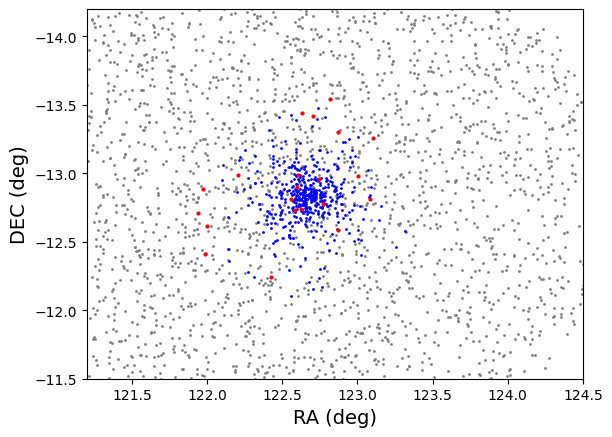

In [112]:
fig, ax = plt.subplots()

ax.scatter(clu2.RA_ICRS, clu2.DE_ICRS, s=1, c='grey')
ax.scatter(dfcg.RA_ICRS, dfcg.DE_ICRS, s=1, c='b')
ax.scatter(clu2.iloc[matched_idx_catalog1].RA_ICRS, clu2.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

Informations:
- Membership crossmatch: 21

In [17]:
population1_lost = clu2.iloc[matched_idx_catalog1]

Match with vanGroeningen+2020.

In [18]:
ra1 = clu2.RA_ICRS
dec1 = clu2.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [19]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vanGroeningen+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [20]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [21]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [22]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [70]:
clu2.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
308,123.007680,-13.927760,5724918868422661120,0.0225,0.0210,0.8103,0.0328,2.498,-2.426,0.033,...,0.958,15.580099,15.963792,15.036696,0.927096,NaN,-32.997611,123.007691,-13.927758,0.852579
518,122.876573,-13.863225,5725107915705369984,0.0249,0.0203,0.8040,0.0383,2.409,-2.290,0.041,...,1.029,15.763227,16.162367,15.196784,0.965583,NaN,-32.968078,122.876584,-13.863222,0.846286
529,122.516375,-13.965907,5725113481983114240,0.0463,0.0348,0.7145,0.0745,2.281,-2.239,0.069,...,0.984,17.050293,17.589607,16.384487,1.205120,NaN,-33.156968,122.516385,-13.965905,0.744836
539,122.556156,-13.847291,5725116849237274752,0.0244,0.0198,0.7071,0.0384,2.272,-2.152,0.035,...,0.975,15.925107,16.289055,15.386557,0.902498,NaN,-33.032424,122.556166,-13.847287,0.748479
544,122.623225,-13.760115,5725126401244507904,0.0488,0.0377,0.7557,0.0697,2.415,-2.357,0.069,...,0.963,17.152250,17.761162,16.422697,1.338465,NaN,-32.931504,122.623236,-13.760112,0.785536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,121.986992,-12.075530,5727777839175515520,0.0126,0.0085,0.7857,0.0186,2.512,-2.378,0.019,...,0.937,14.231053,14.491918,13.813985,0.677933,32.14,-31.456736,121.987003,-12.075527,0.828046
2552,122.125904,-12.096970,5727779797680542464,0.0141,0.0096,0.7248,0.0215,2.197,-2.163,0.022,...,0.989,14.497416,14.759340,14.081089,0.678251,34.35,-31.443894,122.125913,-12.096969,0.767314
2583,122.084503,-11.893047,5727798523739919360,0.0471,0.0336,0.7568,0.0697,2.383,-2.357,0.069,...,1.000,17.198061,17.843935,16.455805,1.388130,NaN,-31.256342,122.084513,-11.893045,0.785921
2713,122.369838,-11.763095,5727883426649794560,0.0098,0.0077,0.7174,0.0149,2.419,-2.345,0.015,...,0.983,13.256223,13.424639,12.966224,0.458415,NaN,-31.061217,122.369849,-11.763092,0.759958


In [71]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1029,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,1.00
1022,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,0.98
971,5725113481983114240,122.516375,-13.965907,0.7145,-2.239,-0.433,17.050293,17.589607,16.384487,NGC_2539,0.74
967,5725116849237274752,122.556156,-13.847291,0.7071,-2.152,-0.728,15.925107,16.289055,15.386557,NGC_2539,0.83
961,5725126401244507904,122.623225,-13.760115,0.7557,-2.357,-0.526,17.152250,17.761162,16.422697,NGC_2539,0.96
...,...,...,...,...,...,...,...,...,...,...,...
264,5727777839175515520,121.986992,-12.075530,0.7857,-2.378,-0.808,14.231053,14.491918,13.813985,NGC_2539,1.00
290,5727779797680542464,122.125904,-12.096970,0.7248,-2.163,-0.385,14.497416,14.759340,14.081089,NGC_2539,1.00
704,5727798523739919360,122.084503,-11.893047,0.7568,-2.357,-0.348,17.198061,17.843935,16.455805,NGC_2539,0.87
399,5727883426649794560,122.369838,-11.763095,0.7174,-2.345,-0.596,13.256223,13.424639,12.966224,NGC_2539,1.00


(121.2, 124.5)

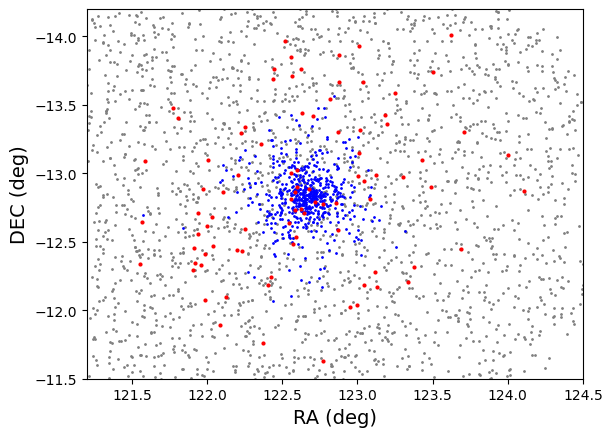

In [118]:
fig, ax = plt.subplots()

ax.scatter(clu2.RA_ICRS, clu2.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(clu2.iloc[matched_idx_catalog1].RA_ICRS, clu2.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

Informations:
- Membership crossmatch: 87

In [23]:
population2_lost = clu2.iloc[matched_idx_catalog1]

### Now we build an catalogue joining members of the crossmatches, both the primary members and the "lost ones"

- Members from the crossmatch with CG+2020.

In [145]:
population1

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,122.480864,-13.408580,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,...,0.988,13.472965,13.666136,13.149684,0.516452,NaN,-32.626777,122.480874,-13.408578,0.779411
1,122.414196,-13.314850,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,...,0.930,13.363639,13.594479,12.984633,0.609845,38.47,-32.552534,122.414207,-13.314847,0.814383
2,122.250761,-13.170479,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,...,1.056,14.926690,15.240170,14.442820,0.797351,NaN,-32.452962,122.250772,-13.170477,0.781669
3,122.103406,-13.064577,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,...,0.998,13.934523,14.170032,13.552169,0.617864,24.37,-32.386462,122.103416,-13.064574,0.802698
5,122.736248,-13.477531,5726679633214860928,0.0129,0.0106,0.7834,0.0185,2.562,-2.527,0.019,...,1.116,14.186480,14.451936,13.763537,0.688398,25.56,-32.630235,122.736259,-13.477529,0.825525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,122.774600,-12.305781,5727617271816364032,0.0158,0.0142,0.7523,0.0232,2.489,-2.374,0.024,...,0.987,14.581053,14.875655,14.124689,0.750966,33.53,-31.487406,122.774611,-12.305778,0.794660
464,122.749541,-12.298492,5727617550992630528,0.0408,0.0394,0.7921,0.0634,2.349,-2.276,0.065,...,0.980,16.656437,17.172783,15.991074,1.181709,NaN,-31.486533,122.749552,-12.298490,0.823610
465,122.746981,-12.238204,5727664933071818624,0.0326,0.0303,0.7213,0.0490,2.408,-2.327,0.047,...,0.957,16.202570,16.640747,15.597906,1.042841,NaN,-31.428826,122.746991,-12.238201,0.754288
466,122.678529,-12.205109,5727665959566833280,0.0263,0.0248,0.7160,0.0404,2.447,-2.376,0.039,...,1.063,15.679736,16.076110,15.110518,0.965592,NaN,-31.413650,122.678540,-12.205106,0.758490


(121.7, 123.5)

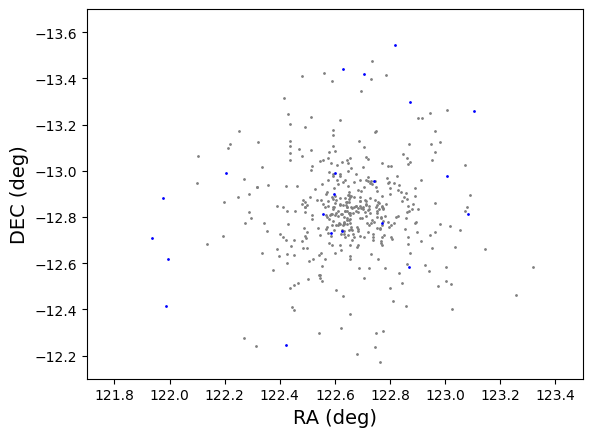

In [162]:
fig, ax = plt.subplots()

ax.scatter(population1.RA_ICRS, population1.DE_ICRS, s=1, c='grey')
ax.scatter(population1_lost.RA_ICRS, population1_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-12.1,-13.7)
ax.set_xlim(121.7,123.5)

Verifying duplicates.

In [180]:
sky1 = SkyCoord(ra=population1.RA_ICRS, dec=population1.DE_ICRS,unit='degree')
sky2 = SkyCoord(ra=population1_lost.RA_ICRS, dec=population1_lost.DE_ICRS,unit='degree')

# Fazer o crossmatch
idx, d2d, _ = sky2.match_to_catalog_sky(sky1)

# Definir uma tolerância máxima para duplicatas
max_sep = 1.0 * u.arcsec
duplicates = d2d < max_sep

In [190]:
duplicates

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

(121.7, 123.5)

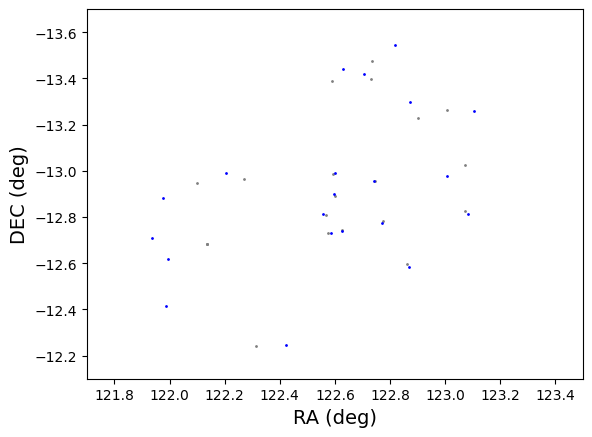

In [192]:
fig, ax = plt.subplots()

ax.scatter(population1.iloc[idx].RA_ICRS, population1.iloc[idx].DE_ICRS, s=1, c='grey')
ax.scatter(population1_lost.RA_ICRS, population1_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-12.1,-13.7)
ax.set_xlim(121.7,123.5)

As expected, we have no duplicates in the limit of 1armin of separation. So we join the two catalogues to make one single.

In [194]:
#combined_catalog1 = pd.concat([population1, population1_lost], ignore_index=True)
#combined_catalog1.to_csv('Catalogues/NGC2539_GMM_Population1.csv', index=False)

- Members from the crossmatch with vG+2023.

In [195]:
population2

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,122.480864,-13.408580,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,...,0.988,13.472965,13.666136,13.149684,0.516452,NaN,-32.626777,122.480874,-13.408578,0.779411
1,122.414196,-13.314850,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,...,0.930,13.363639,13.594479,12.984633,0.609845,38.47,-32.552534,122.414207,-13.314847,0.814383
2,122.250761,-13.170479,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,...,1.056,14.926690,15.240170,14.442820,0.797351,NaN,-32.452962,122.250772,-13.170477,0.781669
3,122.103406,-13.064577,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,...,0.998,13.934523,14.170032,13.552169,0.617864,24.37,-32.386462,122.103416,-13.064574,0.802698
4,122.775145,-13.479979,5726679491477381504,0.0099,0.0081,0.6943,0.0144,2.384,-2.350,0.014,...,1.056,13.190701,13.337885,12.910949,0.426936,NaN,-32.622936,122.775155,-13.479977,0.736667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,122.774600,-12.305781,5727617271816364032,0.0158,0.0142,0.7523,0.0232,2.489,-2.374,0.024,...,0.987,14.581053,14.875655,14.124689,0.750966,33.53,-31.487406,122.774611,-12.305778,0.794660
464,122.749541,-12.298492,5727617550992630528,0.0408,0.0394,0.7921,0.0634,2.349,-2.276,0.065,...,0.980,16.656437,17.172783,15.991074,1.181709,NaN,-31.486533,122.749552,-12.298490,0.823610
465,122.746981,-12.238204,5727664933071818624,0.0326,0.0303,0.7213,0.0490,2.408,-2.327,0.047,...,0.957,16.202570,16.640747,15.597906,1.042841,NaN,-31.428826,122.746991,-12.238201,0.754288
466,122.678529,-12.205109,5727665959566833280,0.0263,0.0248,0.7160,0.0404,2.447,-2.376,0.039,...,1.063,15.679736,16.076110,15.110518,0.965592,NaN,-31.413650,122.678540,-12.205106,0.758490


In [196]:
population2_lost

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
308,123.007680,-13.927760,5724918868422661120,0.0225,0.0210,0.8103,0.0328,2.498,-2.426,0.033,...,0.958,15.580099,15.963792,15.036696,0.927096,NaN,-32.997611,123.007691,-13.927758,0.852579
518,122.876573,-13.863225,5725107915705369984,0.0249,0.0203,0.8040,0.0383,2.409,-2.290,0.041,...,1.029,15.763227,16.162367,15.196784,0.965583,NaN,-32.968078,122.876584,-13.863222,0.846286
529,122.516375,-13.965907,5725113481983114240,0.0463,0.0348,0.7145,0.0745,2.281,-2.239,0.069,...,0.984,17.050293,17.589607,16.384487,1.205120,NaN,-33.156968,122.516385,-13.965905,0.744836
539,122.556156,-13.847291,5725116849237274752,0.0244,0.0198,0.7071,0.0384,2.272,-2.152,0.035,...,0.975,15.925107,16.289055,15.386557,0.902498,NaN,-33.032424,122.556166,-13.847287,0.748479
544,122.623225,-13.760115,5725126401244507904,0.0488,0.0377,0.7557,0.0697,2.415,-2.357,0.069,...,0.963,17.152250,17.761162,16.422697,1.338465,NaN,-32.931504,122.623236,-13.760112,0.785536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,121.986992,-12.075530,5727777839175515520,0.0126,0.0085,0.7857,0.0186,2.512,-2.378,0.019,...,0.937,14.231053,14.491918,13.813985,0.677933,32.14,-31.456736,121.987003,-12.075527,0.828046
2552,122.125904,-12.096970,5727779797680542464,0.0141,0.0096,0.7248,0.0215,2.197,-2.163,0.022,...,0.989,14.497416,14.759340,14.081089,0.678251,34.35,-31.443894,122.125913,-12.096969,0.767314
2583,122.084503,-11.893047,5727798523739919360,0.0471,0.0336,0.7568,0.0697,2.383,-2.357,0.069,...,1.000,17.198061,17.843935,16.455805,1.388130,NaN,-31.256342,122.084513,-11.893045,0.785921
2713,122.369838,-11.763095,5727883426649794560,0.0098,0.0077,0.7174,0.0149,2.419,-2.345,0.015,...,0.983,13.256223,13.424639,12.966224,0.458415,NaN,-31.061217,122.369849,-11.763092,0.759958


Text(0, 0.5, 'DEC (deg)')

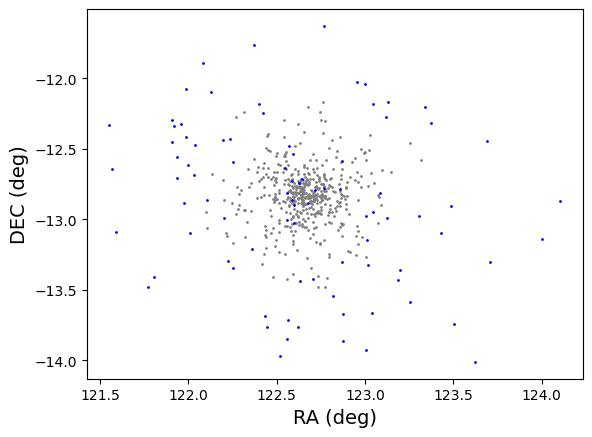

In [199]:
fig, ax = plt.subplots()

ax.scatter(population2.RA_ICRS, population2.DE_ICRS, s=1, c='grey')
ax.scatter(population2_lost.RA_ICRS, population2_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-12.1,-13.7)
#ax.set_xlim(121.7,123.5)

Verifying duplicates.

In [200]:
sky1 = SkyCoord(ra=population2.RA_ICRS, dec=population2.DE_ICRS,unit='degree')
sky2 = SkyCoord(ra=population2_lost.RA_ICRS, dec=population2_lost.DE_ICRS,unit='degree')

# Fazer o crossmatch
idx, d2d, _ = sky2.match_to_catalog_sky(sky1)

# Definir uma tolerância máxima para duplicatas
max_sep = 1.0 * u.arcsec
duplicates = d2d < max_sep

In [201]:
duplicates

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

Text(0, 0.5, 'DEC (deg)')

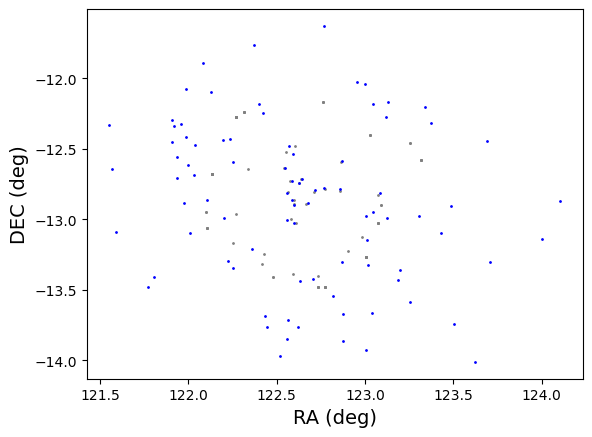

In [205]:
fig, ax = plt.subplots()

ax.scatter(population2.iloc[idx].RA_ICRS, population2.iloc[idx].DE_ICRS, s=1, c='grey')
ax.scatter(population2_lost.RA_ICRS, population2_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-12.1,-13.7)
#ax.set_xlim(121.7,123.5)

As expected, we have no duplicates in the limit of 1armin of separation. So we join the two catalogues to make one single.

In [206]:
#combined_catalog2 = pd.concat([population2, population2_lost], ignore_index=True)
#combined_catalog2.to_csv('Catalogues/NGC2539_GMM_Population2.csv', index=False)

In [24]:
#population1_lost.to_csv('../Catalogues/NGC2539_population1_lost.csv', index=False)
#population2_lost.to_csv('../Catalogues/NGC2539_population2_lost.csv', index=False)